In [1]:
from datasets import load_dataset, DownloadMode

# First, download the dataset with caching
def download_starcoderdata_go(save_directory, split="train", download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS):
    try:
        ds = load_dataset(
            "bigcode/starcoderdata",
            data_dir="go",
            split=split,
            cache_dir=save_directory,
            download_mode=download_mode,
        )

        # Save the dataset properly for later reloading
        output_path = f"{save_directory}/go_{split}_dataset"
        ds.save_to_disk(output_path)

        print(f"Dataset 'bigcode/starcoderdata' (GO, {split}) successfully downloaded and saved to '{output_path}'.")
        return ds

    except Exception as e:
        print(f"Error downloading dataset 'bigcode/starcoderdata' (GO, {split}): {e}")
        return None

In [2]:
ds = download_starcoderdata_go(save_directory="./", split="train")

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

train-00000-of-00024.parquet:   0%|          | 0.00/339M [00:00<?, ?B/s]

train-00001-of-00024.parquet:   0%|          | 0.00/341M [00:00<?, ?B/s]

train-00002-of-00024.parquet:   0%|          | 0.00/339M [00:00<?, ?B/s]

train-00003-of-00024.parquet:   0%|          | 0.00/335M [00:00<?, ?B/s]

train-00004-of-00024.parquet:   0%|          | 0.00/336M [00:00<?, ?B/s]

train-00005-of-00024.parquet:   0%|          | 0.00/336M [00:00<?, ?B/s]

train-00006-of-00024.parquet:   0%|          | 0.00/341M [00:00<?, ?B/s]

train-00007-of-00024.parquet:   0%|          | 0.00/333M [00:00<?, ?B/s]

train-00008-of-00024.parquet:   0%|          | 0.00/337M [00:00<?, ?B/s]

train-00009-of-00024.parquet:   0%|          | 0.00/335M [00:00<?, ?B/s]

train-00010-of-00024.parquet:   0%|          | 0.00/339M [00:00<?, ?B/s]

train-00011-of-00024.parquet:   0%|          | 0.00/338M [00:00<?, ?B/s]

train-00012-of-00024.parquet:   0%|          | 0.00/340M [00:00<?, ?B/s]

train-00013-of-00024.parquet:   0%|          | 0.00/338M [00:00<?, ?B/s]

train-00014-of-00024.parquet:   0%|          | 0.00/338M [00:00<?, ?B/s]

train-00015-of-00024.parquet:   0%|          | 0.00/332M [00:00<?, ?B/s]

train-00016-of-00024.parquet:   0%|          | 0.00/336M [00:00<?, ?B/s]

train-00017-of-00024.parquet:   0%|          | 0.00/336M [00:00<?, ?B/s]

train-00018-of-00024.parquet:   0%|          | 0.00/335M [00:00<?, ?B/s]

train-00019-of-00024.parquet:   0%|          | 0.00/335M [00:00<?, ?B/s]

train-00020-of-00024.parquet:   0%|          | 0.00/335M [00:00<?, ?B/s]

train-00021-of-00024.parquet:   0%|          | 0.00/336M [00:00<?, ?B/s]

train-00022-of-00024.parquet:   0%|          | 0.00/339M [00:00<?, ?B/s]

train-00023-of-00024.parquet:   0%|          | 0.00/339M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/49 [00:00<?, ?it/s]

Saving the dataset (0/49 shards):   0%|          | 0/4700526 [00:00<?, ? examples/s]

Dataset 'bigcode/starcoderdata' (GO, train) successfully downloaded and saved to './/go_train_dataset'.


In [3]:
from datasets import load_from_disk

# Later, load the dataset from the saved location
dataset = load_from_disk("./go_train_dataset")

Loading dataset from disk:   0%|          | 0/49 [00:00<?, ?it/s]

In [4]:
dataset

Dataset({
    features: ['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id', 'content'],
    num_rows: 4700526
})

In [5]:
type(dataset)

datasets.arrow_dataset.Dataset

In [6]:
print(dataset[0])

{'max_stars_repo_path': 'vendor/github.com/elastic/beats/vendor/github.com/awslabs/goformation/v4/cloudformation/codebuild/aws-codebuild-project_vpcconfig.go', 'max_stars_repo_name': 'lstyles/nsgflowlogsbeat', 'max_stars_count': 1, 'id': '0', 'content': 'package codebuild\r\n\r\nimport (\r\n\t"github.com/awslabs/goformation/v4/cloudformation/policies"\r\n)\r\n\r\n// Project_VpcConfig AWS CloudFormation Resource (AWS::CodeBuild::Project.VpcConfig)\r\n// See: http://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-properties-codebuild-project-vpcconfig.html\r\ntype Project_VpcConfig struct {\r\n\r\n\t// SecurityGroupIds AWS CloudFormation Property\r\n\t// Required: false\r\n\t// See: http://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-properties-codebuild-project-vpcconfig.html#cfn-codebuild-project-vpcconfig-securitygroupids\r\n\tSecurityGroupIds []string `json:"SecurityGroupIds,omitempty"`\r\n\r\n\t// Subnets AWS CloudFormation Property\r\n\t// Required: false\r

In [7]:
dataset = dataset.sort(column_names=["max_stars_count", "max_stars_repo_name"], reverse=[True, False])

In [8]:
# Print the first 10 examples
for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print("\n")
    else:
        break

Example 0:
// Copyright © 2019 <NAME> <<EMAIL>>
//
// Licensed under the Apache License, Version 2.0 (the "License");
// you may not use this file except in compliance with the License.
// You may obtain a copy of the License at
//
//     http://www.apache.org/licenses/LICENSE-2.0
//
// Unless required by applicable law or agreed to in writing, software
// distributed under the License is distributed on an "AS IS" BASIS,
// WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
// See the License for the specific language governing permissions and
// limitations under the License.

// The source repository URL: https://github.com/panjf2000/gen-license-go

package cmd

import (
	"os"
	"fmt"
	"path"
	"strings"
	"io/ioutil"

	"github.com/spf13/cobra"
)

var LICENSES []string

// rootCmd represents the base command when called without any subcommands
var rootCmd = &cobra.Command{
	Use:   "gen-license-go",
	Short: "gen-license-go is a open-source licenses generator impleme

In [9]:
from datasets import Dataset

def calculate_avg_line_length(example):
    lines = example['content'].split('\n')
    avg_length = sum(len(line) for line in lines) / len(lines)
    example['avg_line_length'] = avg_length
    return example

dataset = dataset.map(calculate_avg_line_length)

for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print(f"Average Line Length: {example['avg_line_length']}\n")
    else:
        break

Map:   0%|          | 0/4700526 [00:00<?, ? examples/s]

Example 0:
// Copyright © 2019 <NAME> <<EMAIL>>
//
// Licensed under the Apache License, Version 2.0 (the "License");
// you may not use this file except in compliance with the License.
// You may obtain a copy of the License at
//
//     http://www.apache.org/licenses/LICENSE-2.0
//
// Unless required by applicable law or agreed to in writing, software
// distributed under the License is distributed on an "AS IS" BASIS,
// WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
// See the License for the specific language governing permissions and
// limitations under the License.

// The source repository URL: https://github.com/panjf2000/gen-license-go

package cmd

import (
	"os"
	"fmt"
	"path"
	"strings"
	"io/ioutil"

	"github.com/spf13/cobra"
)

var LICENSES []string

// rootCmd represents the base command when called without any subcommands
var rootCmd = &cobra.Command{
	Use:   "gen-license-go",
	Short: "gen-license-go is a open-source licenses generator impleme

In [10]:
sliced_dataset = dataset[:2500000]

In [11]:
del dataset

In [12]:
import pandas as pd

df = pd.DataFrame(sliced_dataset)

In [13]:
avg_line_length_stats = df['avg_line_length'].describe()
print("Statistics for avg_line_length:")
print(avg_line_length_stats)

Statistics for avg_line_length:
count    2.500000e+06
mean     2.440616e+01
std      7.891818e+00
min      1.011209e+00
25%      1.926190e+01
50%      2.344660e+01
75%      2.823077e+01
max      1.155000e+02
Name: avg_line_length, dtype: float64


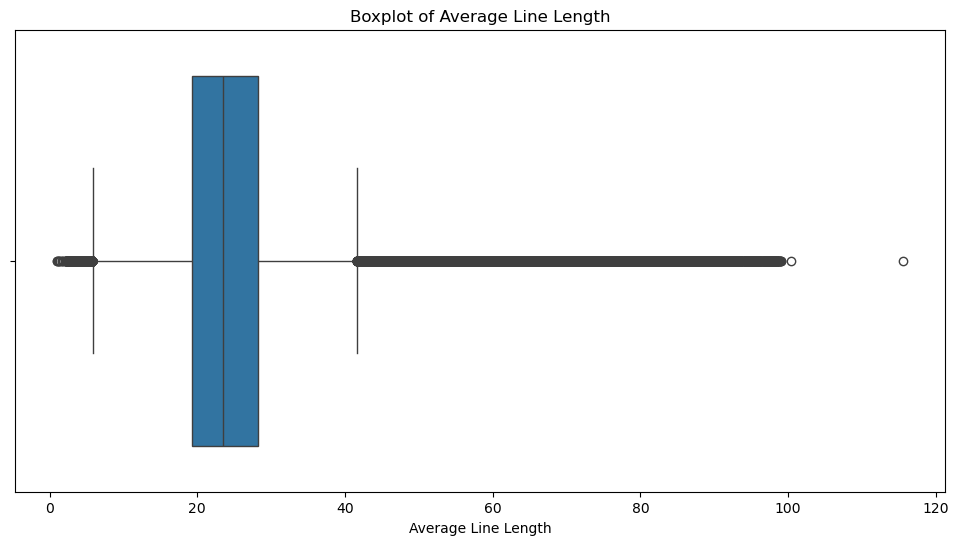

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['avg_line_length'])
plt.title('Boxplot of Average Line Length')
plt.xlabel('Average Line Length')
plt.show()

In [15]:
Q1 = df['avg_line_length'].quantile(0.25)
Q3 = df['avg_line_length'].quantile(0.75)
IQR = Q3 - Q1


In [16]:
outliers = df[(df['avg_line_length'] < (Q1 - 1.5 * IQR)) | (df['avg_line_length'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 72290


In [17]:
outliers['avg_line_length'].describe()

count    72290.000000
mean        49.670498
std         10.558685
min          1.011209
25%         43.610722
50%         46.676325
75%         52.654616
max        115.500000
Name: avg_line_length, dtype: float64

In [18]:
df.drop(outliers.index, inplace=True)

In [19]:
df['avg_line_length'].describe()

count    2.427710e+06
mean     2.365386e+01
std      6.422103e+00
min      5.818182e+00
25%      1.913333e+01
50%      2.321538e+01
75%      2.772043e+01
max      4.168391e+01
Name: avg_line_length, dtype: float64

In [20]:
import numpy as np

np.percentile(df['avg_line_length'], 80)

28.93220338983051

In [21]:
df['line_count'] = df['content'].apply(lambda x: len(x.split('\n')))
df['line_count'].describe()

count    2.427710e+06
mean     1.627925e+02
std      6.354678e+02
min      1.000000e+00
25%      3.700000e+01
50%      7.600000e+01
75%      1.540000e+02
max      1.140890e+05
Name: line_count, dtype: float64

In [22]:
count_range_dict = {
    "0-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0,
    "501-600": 0,
    "601-700": 0,
    "701-800": 0,
    "801-900": 0,
    "901-1000": 0,
    "1000+": 0
}

for count in df['line_count']:
    if count <= 100:
        count_range_dict["0-100"] += 1
    elif count <= 200:
        count_range_dict["101-200"] += 1
    elif count <= 300:
        count_range_dict["201-300"] += 1
    elif count <= 400:
        count_range_dict["301-400"] += 1
    elif count <= 500:
        count_range_dict["401-500"] += 1
    elif count <= 600:
        count_range_dict["501-600"] += 1
    elif count <= 700:
        count_range_dict["601-700"] += 1
    elif count <= 800:
        count_range_dict["701-800"] += 1
    elif count <= 900:
        count_range_dict["801-900"] += 1
    elif count <= 1000:
        count_range_dict["901-1000"] += 1
    else:
        count_range_dict["1000+"] += 1

In [23]:
for key, value in count_range_dict.items():
    print(f"Number of examples with line count in range {key}: {value}")

Number of examples with line count in range 0-100: 1470760
Number of examples with line count in range 101-200: 523904
Number of examples with line count in range 201-300: 191915
Number of examples with line count in range 301-400: 88256
Number of examples with line count in range 401-500: 46341
Number of examples with line count in range 501-600: 27270
Number of examples with line count in range 601-700: 17040
Number of examples with line count in range 701-800: 11533
Number of examples with line count in range 801-900: 8310
Number of examples with line count in range 901-1000: 6322
Number of examples with line count in range 1000+: 36059


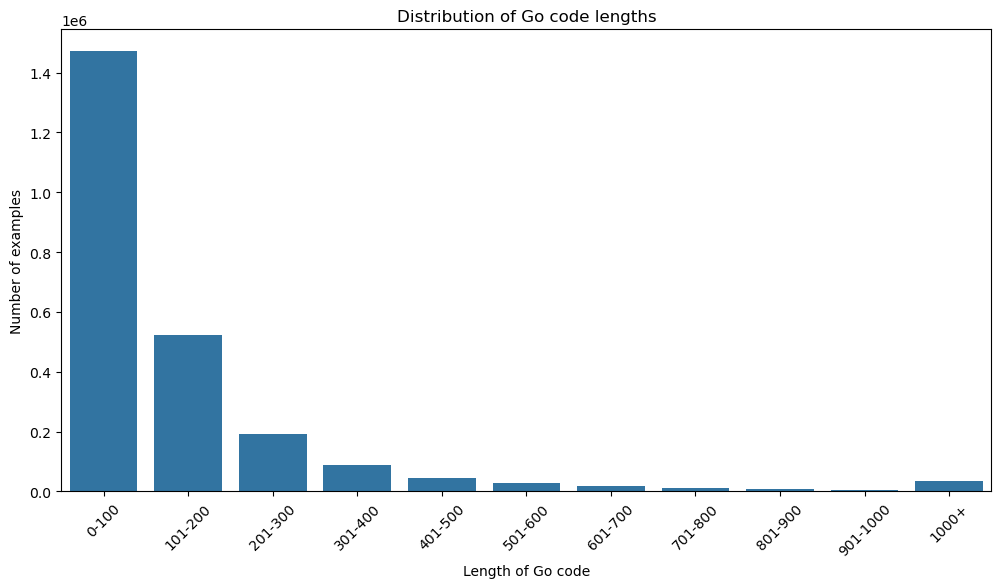

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_range_dict.keys()), y=list(count_range_dict.values()))
plt.title("Distribution of Go code lengths")
plt.xlabel("Length of Go code")
plt.ylabel("Number of examples")
plt.xticks(rotation=45)
plt.show()

In [25]:
df_line = pd.DataFrame(list(count_range_dict.items()), columns=["Length", "Count"])
df_line["Cumulative Count"] = df_line["Count"].cumsum()
df_line["Percentage"] = df_line["Count"] / df_line["Count"].sum() * 100
df_line["Cumulative Percentage"] = df_line["Percentage"].cumsum()
df_line.head(11)

,Length,Count,Cumulative Count,Percentage,Cumulative Percentage
0,0-100,1470760,1470760,60.582195,60.582195
1,101-200,523904,1994664,21.580172,82.162367
2,201-300,191915,2186579,7.905186,90.067553
3,301-400,88256,2274835,3.635360,93.702913
4,401-500,46341,2321176,1.908836,95.611749
5,501-600,27270,2348446,1.123281,96.735030
6,601-700,17040,2365486,0.701896,97.436926
7,701-800,11533,2377019,0.475057,97.911983
8,801-900,8310,2385329,0.342298,98.254281
9,901-1000,6322,2391651,0.260410,98.514691


In [26]:
df.columns

Index(['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id',
       'content', 'avg_line_length', 'line_count'],
      dtype='object')

In [27]:
df_filtered = df.drop(columns=['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id'], axis=1)
df_filtered.head()

,content,avg_line_length,line_count
0,// Copyright © 2019 <NAME> <<EMAIL>>\n//\n// L...,31.897436,78
1,/*\nCopyright 2018 The TensorFlow Authors. All...,27.473684,247
2,/*\nCopyright 2018 The TensorFlow Authors. All...,27.200000,110
3,<reponame>abhaikollara/tensorflow<gh_stars>100...,22.560886,271
4,/*\nCopyright 2016 The TensorFlow Authors. All...,31.640000,50


In [28]:
df_filtered.shape

(2427710, 3)

In [29]:
df_filtered = df_filtered[df_filtered['line_count'] <= 400]
df_filtered.shape

(2274835, 3)

In [30]:
df_filtered = df_filtered[df_filtered['avg_line_length'] <= 29]
df_filtered.shape

(1855535, 3)

In [31]:
df_filtered.head()

,content,avg_line_length,line_count
1,/*\nCopyright 2018 The TensorFlow Authors. All...,27.473684,247
2,/*\nCopyright 2018 The TensorFlow Authors. All...,27.200000,110
3,<reponame>abhaikollara/tensorflow<gh_stars>100...,22.560886,271
6,<filename>tensorflow/go/shape_test.go\n/*\nCop...,24.310345,87
7,<filename>tensorflow/go/genop/internal/api_def...,27.469231,130


In [32]:
print(df[["avg_line_length", "line_count"]].describe())
print()
print(df_filtered.describe())

       avg_line_length    line_count
count     2.427710e+06  2.427710e+06
mean      2.365386e+01  1.627925e+02
std       6.422103e+00  6.354678e+02
min       5.818182e+00  1.000000e+00
25%       1.913333e+01  3.700000e+01
50%       2.321538e+01  7.600000e+01
75%       2.772043e+01  1.540000e+02
max       4.168391e+01  1.140890e+05

       avg_line_length    line_count
count     1.855535e+06  1.855535e+06
mean      2.115704e+01  9.068121e+01
std       4.550250e+00  8.013401e+01
min       5.818182e+00  1.000000e+00
25%       1.802128e+01  3.300000e+01
50%       2.147685e+01  6.400000e+01
75%       2.473666e+01  1.230000e+02
max       2.900000e+01  4.000000e+02


In [33]:
data_dict_go = {}

for i, example in enumerate(df_filtered["content"]):
    data_dict_go[f"go_{i}"] = example

In [34]:
assert len(data_dict_go) == len(df_filtered), "Data dictionary length does not match the number of examples in the dataset."

In [35]:
for i, (k,v) in enumerate(data_dict_go.items()):
    if i < 5:
        print(f"Example {k}:")
        print(v)
        print("\n")
    else:
        break

Example go_0:
/*
Copyright 2018 The TensorFlow Authors. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
*/

package tensorflow

// #include <stdlib.h>
// #include "tensorflow/c/c_api.h"
import "C"
import (
	"fmt"
	"unsafe"
)

// makeCShape converts a shape specified in C.int64_t into a Shape.
func makeCShape(shape []C.int64_t) Shape {
	s := Shape{dims: make([]int64, len(shape))}
	for i, n := range shape {
		s.dims[i] = int64(n)
	}
	return s
}

// Attr returns the value of an attribute on op. It re

In [36]:
import json

with open('go_train.json', 'w') as f:
    json.dump(data_dict_go, f)
    print("Saved to 'go_train.json'")

Saved to 'go_train.json'
